## Import Modules

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
fish_data = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Fish.csv')

In [30]:
fish_data.head(2)

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.52,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.48,4.3056,24.0,26.3,31.2


In [31]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [32]:
fish_data.groupby('Species').mean()

,Category,Weight,Height,Width,Length1,Length2,Length3
Species,,,,,,,
Bream,1.0,617.828571,15.183211,5.427614,30.305714,33.108571,38.354286
Parkki,2.0,154.818182,8.962427,3.220736,18.727273,20.345455,22.790909
Perch,3.0,382.239286,7.861870,4.745723,25.735714,27.892857,29.571429
Pike,4.0,718.705882,7.713771,5.086382,42.476471,45.482353,48.717647
Roach,5.0,152.050000,6.694795,3.657850,20.645000,22.275000,24.970000
Smelt,6.0,11.178571,2.209371,1.340093,11.257143,11.921429,13.035714
Whitefish,7.0,531.000000,10.027167,5.473050,28.800000,31.316667,34.316667


In [34]:
X = fish_data.drop('Species', axis=1)
y = fish_data['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [36]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:

def evaluate_model_performance(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model_performance(y_test, y_pred)

1.0
[[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       1.00      1.00      1.00         9
        Pike       1.00      1.00      1.00         3
       Roach       1.00      1.00      1.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       1.00      1.00      1.00         3

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.90625
[[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  2  0  0]]
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.90      1.00      0.95         9
        Pike       1.00      1.00      1.00         3
       Roach       0.33      1.00      0.50         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.91        32
   macro avg       0.75      0.86      0.78        32
weighted avg       0.86      0.91      0.88        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Error Rate')

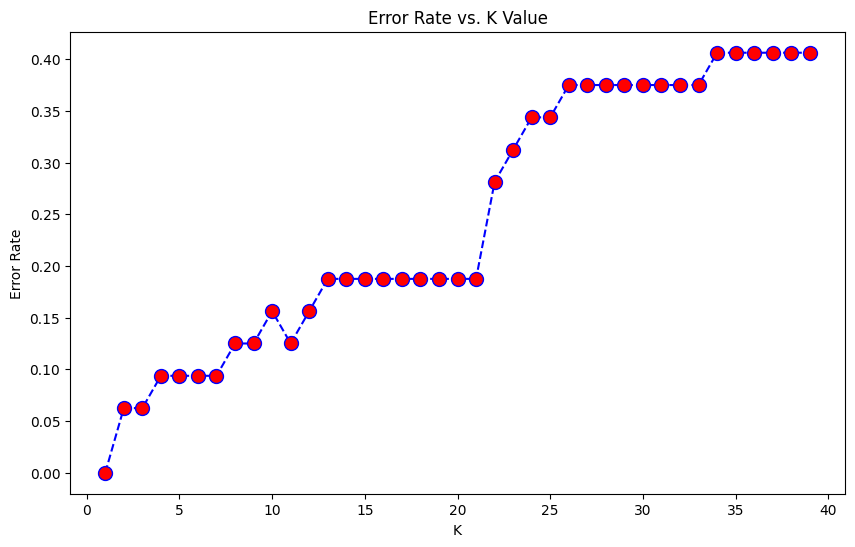

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Calculating the K value for the best performance
error_rate = []

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled,y_train)
    pred_i = model.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

evaluate_model_performance(y_test, y_pred)

0.90625
[[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  2  0  0]]
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.90      1.00      0.95         9
        Pike       1.00      1.00      1.00         3
       Roach       0.33      1.00      0.50         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.91        32
   macro avg       0.75      0.86      0.78        32
weighted avg       0.86      0.91      0.88        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
comparing_result = pd.DataFrame(columns=['original species', 'predicted species'])
comparing_result['original species'] = y_test
comparing_result['predicted species'] = y_pred

for i in comparing_result.index:
    if comparing_result['original species'][i] != comparing_result['predicted species'][i]:
        print(comparing_result.loc[i])

original species     Whitefish
predicted species        Roach
Name: 55, dtype: object
original species     Whitefish
predicted species        Perch
Name: 60, dtype: object
original species     Whitefish
predicted species        Roach
Name: 56, dtype: object
